In [34]:
# FRED API initializing
!pip install fredapi

In [35]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fredapi import Fred

In [36]:
# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='API KEY')

In [37]:
# 1. Fetch the data series from FRED
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DF
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [38]:
def get_real_wage(nominal_col, cpi_col):
  """
  Takes a nominal column and a CPI column
  Returns a new column adjusted for inflation (Real Dollars)
  """
  # 1. Get the CPI of the most recent date (Today's Price
  cpi_today = cpi_col.iloc[-1]

  # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
  real_col = (nominal_col / cpi_col) * cpi_today

  return real_col

df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

In [39]:
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


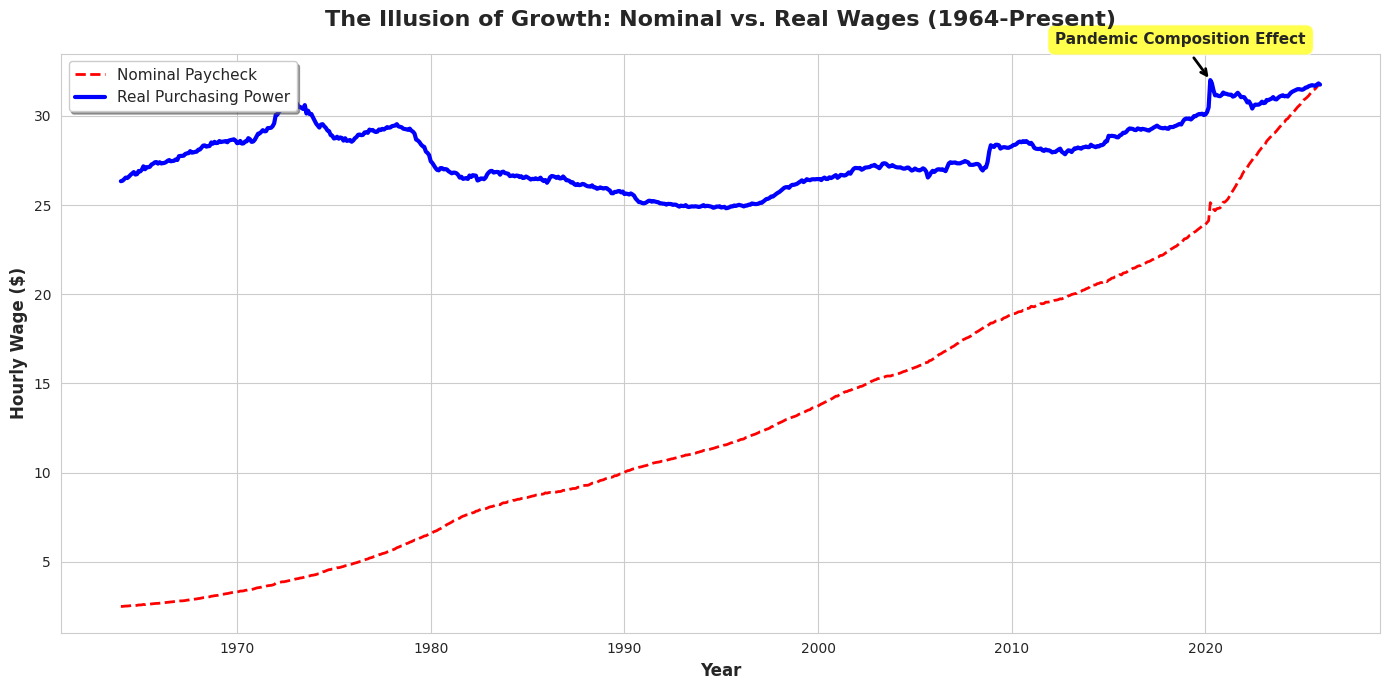

In [40]:
### Visualization

# Set the style
sns.set_style('whitegrid')

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both lines
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--', color='red', linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-', color='blue', linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Hourly Wage ($)', fontsize=12, fontweight='bold')

# Add annotation for 2020 pandemic spike
# Find the 2020 spike (peak in real wages around 2020)
pandemic_period = df.loc['2020-03':'2020-06']
spike_date = pandemic_period['Real_Wage'].idxmax()
spike_value = pandemic_period['Real_Wage'].max()

ax.annotate('Pandemic Composition Effect',
            xy=(spike_date, spike_value),
            xytext=(spike_date - pd.DateOffset(years=8), spike_value + 2),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Improve layout
plt.tight_layout()

# Display
plt.show()